In [35]:
%matplotlib inline
import seaborn as sns
import numpy, scipy, matplotlib.pyplot as plt, pandas
import librosa, librosa.display
import IPython.display as ipd

In [36]:
plt.rcParams['figure.figsize']= (15,6)

# Audio Represenations


In performance, musicians convert sheet music representations into sound which is transmitted through the air as air pressure oscillations. In essence, sound is simply air vibrating.
An audio signal is a representation of sound that represents the fluctuation in air pressure caused by the vibration as a function of time. Unlike sheet music or symbolic representations, audio representations encode everything that is necessary to reproduce an acoustic realization of a piece of music. However, note parameters such as onsets, durations, and pitches are not encoded explicitly. This makes converting from an audio representation to a symbolic representation a difficult and ill-defined task.

# Waveforms and the Time Domain

The basic representation of an audio signal is in the time domain.

Let's listen to a file:


In [37]:
x, sr = librosa.load('audio/c_strum.wav')
ipd.Audio(x, rate=sr)

The change in air pressure at a certain time is graphically represented by a pressure-time plot, or simply waveform.

Digital computers can only capture this data at discrete moments in time. The rate at which a computer captures audio data is called the sampling frequency (often abbreviated fs) or sampling rate (often abbreviated sr)

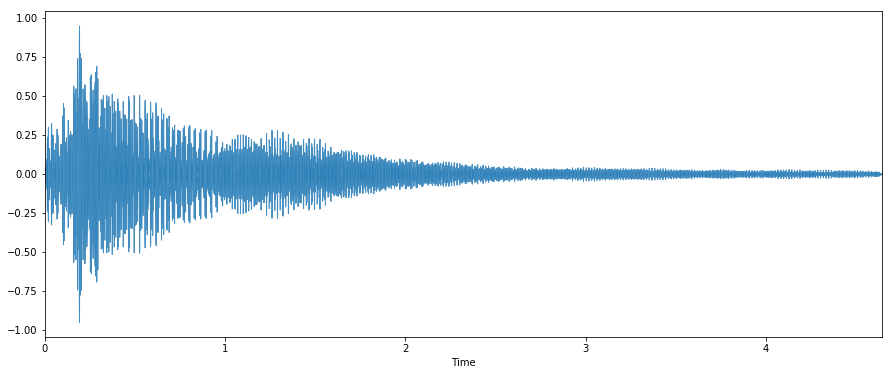

In [38]:
librosa.display.waveplot(x, sr, alpha=0.8) #alpha=opacity

# Timbre: Temporal Indicators

**Timbre** is the quality of sound that distinguishes the tone of different instruments and voices even if the sounds have the same pitch and loudness.

One characteristic of timbre is its temporal evolution. The **envelope** of a signal is a smooth curve that approximates the amplitude extremes of a waveform over time.

Envelopes are often modeled by the ADSR model (Wikipedia) which describes four phases of a sound: attack, decay, sustain, release.

During the attack phase, the sound builds up, usually with noise-like components over a broad frequency range. Such a noise-like short-duration sound at the start of a sound is often called a transient.

During the decay phase, the sound stabilizes and reaches a steady periodic pattern.

During the sustain phase, the energy remains fairly constant.

During the release phase, the sound fades away.

The ADSR model is a simplification and does not necessarily model the amplitude envelopes of all sounds.

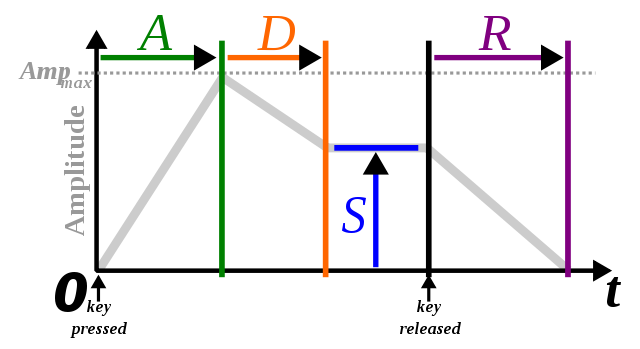

In [39]:
ipd.Image("https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/ADSR_parameter.svg/640px-ADSR_parameter.svg.png")

## Higher vs Lower Pitch Sound

In [41]:
T = 2.0 # seconds
f0 = 10047.0
sr = 22050
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.1*numpy.sin(2*numpy.pi*f0*t)
ipd.Audio(x, rate=sr)

In [58]:
T = 2.0 # seconds
f0 = 2047.0
sr = 22050
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.1*numpy.sin(2*numpy.pi*f0*t)
ipd.Audio(x, rate=sr)

# Timbre: Spectral Indicators

Another property used to characterize timbre is the existence of partials and their relative strengths. **Partials** are the dominant frequencies in a musical tone with the lowest partial being the fundamental frequency.

The partials of a sound are visualized with a spectrogram. A **spectrogram** shows the intensity of frequency components over time. (See Fourier Transform and Short-Time Fourier Transform for more.)
# Pure Tone

Let's synthesize a pure tone at 1047 Hz, concert C6:

In [43]:
T = 2.0 # seconds
f0 = 1047.0
sr = 22050
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.1*numpy.sin(2*numpy.pi*f0*t)
ipd.Audio(x, rate=sr)

Display spectrum of pure tone:

Text(0.5,0,u'Frequency (Hz)')

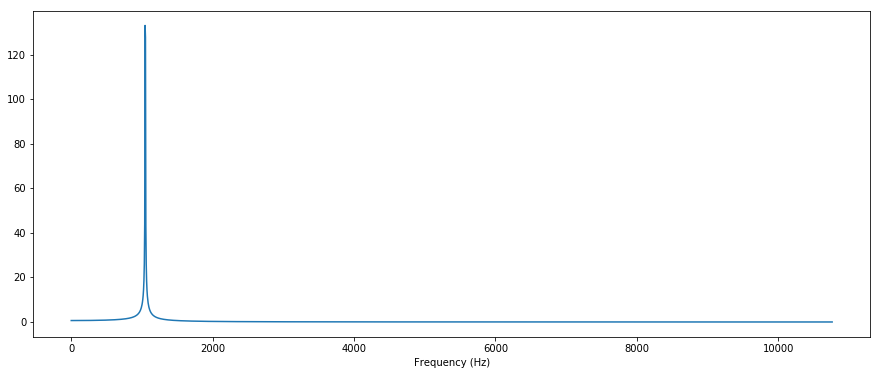

In [44]:
X= scipy.fft(x[:4096])
X_mag= numpy.absolute(X)        #spectral magnitude
f=numpy.linspace(0,sr,4096)     #frequency variable
plt.plot(f[:2000],X_mag[:2000]) #magnitude spectrum
plt.xlabel('Frequency (Hz)')

# Oboe 

Lets listen to oboe playing C6:

In [50]:
x, sr = librosa.load('audio/oboe_c6.wav')
ipd.Audio(x, rate=sr)


In [51]:
print (x.shape)

(23625,)


Spectrum of oboe:

Text(0.5,0,u'Frequency (Hz)')

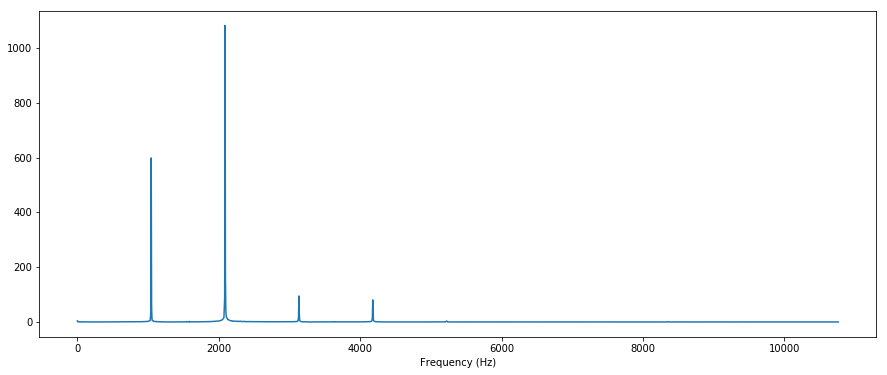

In [52]:
X = scipy.fft(x[10000:14096])
X_mag = numpy.absolute(X)
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

# Clarinet

Lets listen to clarinet playing concert C6:

In [53]:
x, sr = librosa.load('audio/clarinet_c6.wav')
ipd.Audio(x, rate=sr)

In [54]:
print x.shape

(51386,)


Text(0.5,0,u'Frequency (Hz)')

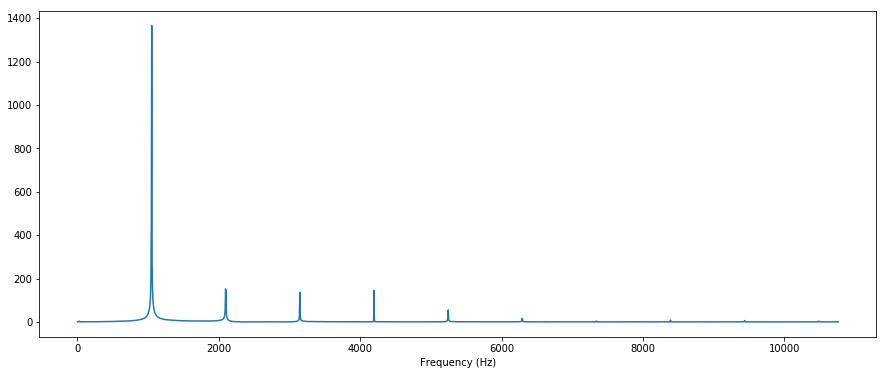

In [55]:
X = scipy.fft(x[10000:14096])
X_mag = numpy.absolute(X)
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

 Notice the difference in the relative amplitudes of the partial components. All three signals have approximately the same pitch and fundamental frequency, yet their timbres differ.

In [68]:
%pylab inline

import warnings
warnings.filterwarnings('ignore')

# numerical processing and scientific libraries
import numpy as np
import scipy

# signal processing
from scipy.io                     import wavfile
from scipy                        import stats, signal
from scipy.fftpack                import fft

from scipy.signal                 import lfilter, hamming
from scipy.fftpack.realtransforms import dct
#from scikits.talkbox              import segment_axis
#from scikits.talkbox.features     import mfcc

# general purpose
import collections

# plotting
import matplotlib.pyplot as plt
from numpy.lib                    import stride_tricks

from IPython.display              import HTML
from base64                       import b64encode

# Classification and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [61]:
sound_files = collections.defaultdict(dict)

In [64]:
print sound_files.keys()

[]


In [81]:
sound_files["Classic"]["path"]         = r"../genres_data_au/classical/classical.00001"
sound_files["Classic"]["online_id"]    = 70444

sound_files["Jazz"]["path"]            = r"../genres_data_au/jazz/jazz.00001"
sound_files["Jazz"]["online_id"]       = 22974

sound_files["Rock"]["path"]            = r"../genres_data_au/rock/rock.00001"
sound_files["Rock"]["online_id"]       = 61491

sound_files["Country"]["path"]      = r"../genres_data_au/country/country.00001"
sound_files["Country"]["online_id"] = 37909

sound_files["Metal"]["path"]           = r"../genres_data_au/metal/metal.00001"
sound_files["Metal"]["online_id"]      = 30919

sound_files["Pop"]["path"]             = r"../genres_data_au/pop/pop.00001"
sound_files["Pop"]["online_id"]        = 70602


In [82]:
for genre in sound_files.keys():

    samplerate, wavedata = wavfile.read(sound_files[genre]["path"])
    
    sound_files[genre]["samplerate"]        = samplerate
    sound_files[genre]["wavedata"]          = wavedata
    sound_files[genre]["number_of_samples"] = wavedata.shape[0]
    sound_files[genre]["song_length"]       = int( sound_files[genre]["number_of_samples"] / samplerate ) # round up


In [95]:
PLOT_WIDTH  = 15
PLOT_HEIGHT = 3.5
import librosa as lr
def normalize_wav(wavedata,samplewidth=2):

    # samplewidth in byte (i.e.: 1 = 8bit, 2 = 16bit, 3 = 24bit, 4 = 32bit)
    divisor  = 2**(8*samplewidth)/2
    wavedata = wavedata / float(divisor)
    return (wavedata)

def show_stereo_waveform(wavedata):

    fig = plt.figure(num=None, figsize=(PLOT_WIDTH, 5), dpi=72, facecolor='w', edgecolor='k');

    channel_1 = fig.add_subplot(211);
    channel_1.set_ylabel('Channel 1');
    lr.display.waveplot(normalize_wav(wavedata[:]), sr=sound_files[genre]["samplerate"], alpha=0.75);
    
    plt.show();
    plt.clf();


In [96]:
print (sound_files["Classic"]["wavedata"].shape)

(661794,)


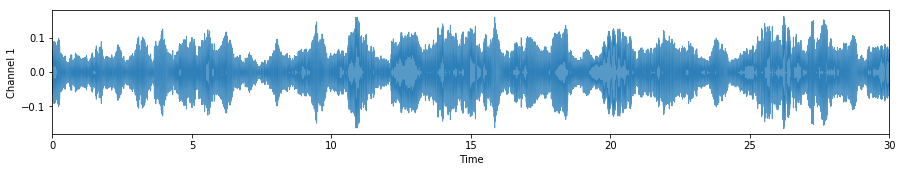

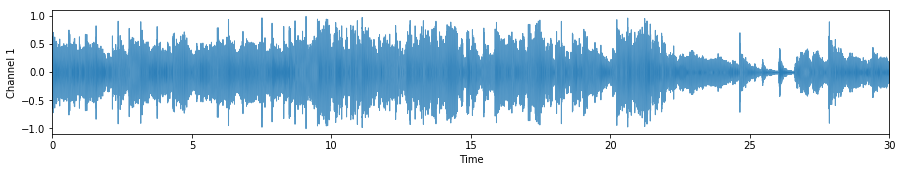

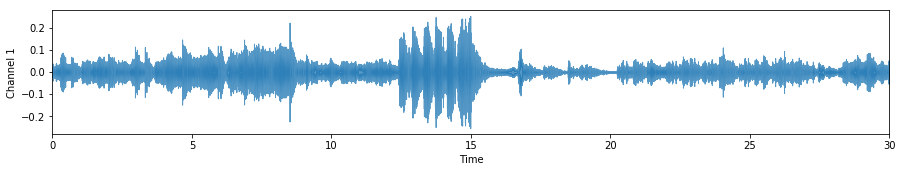

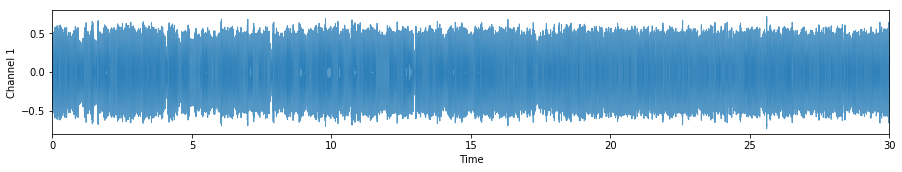

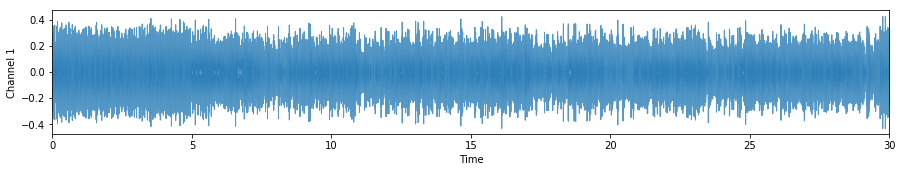

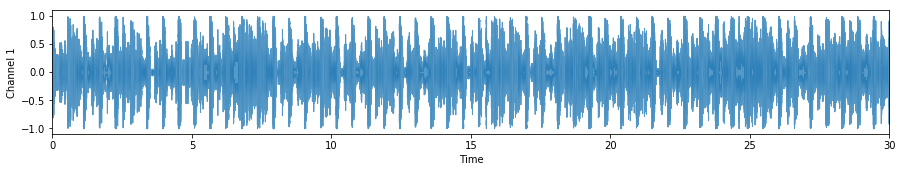

In [99]:
show_stereo_waveform(sound_files["Classic"]["wavedata"]);
show_stereo_waveform(sound_files["Rock"]["wavedata"]);
show_stereo_waveform(sound_files["Jazz"]["wavedata"]);
show_stereo_waveform(sound_files["Country"]["wavedata"]);
show_stereo_waveform(sound_files["Metal"]["wavedata"]);
show_stereo_waveform(sound_files["Pop"]["wavedata"]);

In [100]:
def zero_crossing_rate(wavedata, block_length, sample_rate):
    
    # how many blocks have to be processed?
    num_blocks = int(np.ceil(len(wavedata)/block_length))
    
    # when do these blocks begin (time in seconds)?
    timestamps = (np.arange(0,num_blocks - 1) * (block_length / float(samplerate)))
    
    zcr = []
    
    for i in range(0,num_blocks-1):
        
        start = i * block_length
        stop  = np.min([(start + block_length - 1), len(wavedata)])
        
        zc = 0.5 * np.mean(np.abs(np.diff(np.sign(wavedata[start:stop]))))
        zcr.append(zc)
    
    return np.asarray(zcr), np.asarray(timestamps)

In [106]:
genre = "Rock"
    
# calculate zero-crossing-rate
zcr = zero_crossing_rate(sound_files[genre]["wavedata"], 2048, sound_files[genre]["samplerate"]);
    
# show_feature_superimposed(genre, zcr, ts);

In [151]:
def create_features(song_file):
    x = []
    mono, fs = librosa.load(song_file, sr = 44100)
    frameLength = int(len(mono)/20)
    zcr = librosa.feature.zero_crossing_rate(mono, frame_length=2048, hop_length=512, center=True)
    rms = librosa.feature.rmse(mono, S=None, n_fft=2048, hop_length=512)
    mfcc= librosa.feature.mfcc(mono, sr=44100, S=None, n_mfcc=20)
    spec_bw = librosa.feature.spectral_bandwidth(y=mono, sr=44100)
    chroma = librosa.feature.chroma_stft(mono, sr=44100, S=None, norm=np.inf, n_fft=2048, hop_length=512, tuning=None)
    mel_spec = librosa.feature.melspectrogram(mono, sr=44100, S=None, n_fft=2048, hop_length=512)
    spec_cent = librosa.feature.spectral_centroid(mono, sr=44100, S=None, n_fft=2048, hop_length=512, freq=None)
    spec_band = librosa.feature.spectral_bandwidth(mono, sr=44100, S=None, n_fft=2048, hop_length=512, freq=None, centroid=None,\
                                                   norm=True, p=2)
    spec_contr = librosa.feature.spectral_contrast(mono, sr=44100, S=None, n_fft=2048, hop_length=512, freq=None, fmin=200.0,\
                                                   n_bands=6, quantile=0.02, linear=False)
    spec_rolloff = librosa.feature.spectral_rolloff(mono, sr=44100, S=None, n_fft=2048, hop_length=512, freq=None, roll_percent=0.85)
    tonnetz = librosa.feature.tonnetz(mono, sr=44100, chroma=None)
    tempogram = librosa.feature.tempogram(mono, sr=44100, onset_envelope=None, hop_length=512, win_length=384, center=True,\
                                        norm=np.inf)
#    print 'Number of ZCR columns:%s\nNumber of RMS columns:%s' % (len(zcr[0]), len(rms[0])) 
#    zcr:  (1, 867)
#    rms:  (1, 867)
#    mfcc:  (20, 867)
#    spec_bw:  (1, 867)
#    chroma:  (12, 867)
#    mel_spec:  (128, 867)
#    spec_cent:  (1, 867)
#    spec_band:  (1, 867)
#    spec_contr:  (7, 867)
#    spec_rolloff:  (1, 867)
#    tonnetz:  (6, 867)
#    tempogram:  (384, 867)
    
    rms_mean = np.mean(rms[0])
    rms_std  = np.std(rms[0])
    rms_skew = scipy.stats.skew(rms[0], axis=0, bias=True)
 
    zcr_mean = np.mean(zcr[0])
    zcr_std  = np.std(zcr[0])
    zcr_skew = scipy.stats.skew(zcr[0], axis=0, bias=True)
    
    spec_cent_mean = np.mean(spec_cent[0])
    spec_cent_std  = np.std(spec_cent[0])
    spec_cent_skew = scipy.stats.skew(spec_cent[0], axis=0, bias=True)
   
    spec_band_mean = np.mean(spec_band[0])
    spec_band_std  = np.std(spec_band[0])
    spec_band_skew = scipy.stats.skew(spec_band[0], axis=0, bias=True)
       
    spec_rolloff_mean = np.mean(spec_rolloff[0])
    spec_rolloff_std  = np.std(spec_rolloff[0])
    spec_rolloff_skew = scipy.stats.skew(spec_rolloff[0], axis=0, bias=True)
       
    spec_bw_mean = np.mean(spec_bw[0])
    spec_bw_std  = np.std(spec_bw[0])
    spec_bw_skew = scipy.stats.skew(spec_bw[0], axis=0, bias=True)
       
    mfcc_mean = []
    mfcc_std  = []
    mfcc_skew = []
    mfcc_kurt = []
    for i in range(len(mfcc[:, 0])):
        mfcc_mean.append(np.mean(mfcc[i]))
        mfcc_std.append(np.std(mfcc[i]))
        mfcc_skew.append(scipy.stats.skew(mfcc[i], axis=0, bias=True))
        mfcc_kurt.append(scipy.stats.kurtosis(mfcc[i], axis=0, fisher=True, bias=True))
        
    
    chroma_mean = []
    chroma_std  = []
    chroma_skew = []
    for i in range(len(chroma[:, 0])):
        chroma_mean.append(np.mean(chroma[i,0]))
        chroma_std.append(np.std(chroma[i]))
        chroma_skew.append(scipy.stats.skew(chroma[i], axis=0, bias=True))
        
    mel_spec_mean = []
    mel_spec_std  = []
    mel_spec_skew = []
    for i in range(len(mel_spec[:, 0])):
        mel_spec_mean.append(np.mean(mel_spec[i]))
        mel_spec_std.append(np.std(mel_spec[i]))
        mel_spec_skew.append(scipy.stats.skew(mel_spec[i], axis=0, bias=True))
        
    spec_contr_mean = []
    spec_contr_std  = []
    spec_contr_skew = []
    for i in range(len(spec_contr[:, 0])):
        spec_contr_mean.append(np.mean(spec_contr[i]))
        spec_contr_std.append(np.std(spec_contr[i]))
        spec_contr_skew.append(scipy.stats.skew(spec_contr[i], axis=0, bias=True))
        
    tonnetz_mean = []
    tonnetz_std  = []
    tonnetz_skew = []
    for i in range(len(tonnetz[:, 0])):
        tonnetz_mean.append(np.mean(tonnetz[i]))
        tonnetz_std.append(np.std(tonnetz[i]))
        tonnetz_skew.append(scipy.stats.skew(tonnetz[i], axis=0, bias=True))
        
    tempogram_mean = []
    tempogram_std  = []
    tempogram_skew = []
    for i in range(len(tempogram[:, 0])):
        tempogram_mean.append(np.mean(tempogram[i]))                
        tempogram_std.append(np.std(tempogram[i]))
        tempogram_skew.append(scipy.stats.skew(tempogram[i], axis=0, bias=True))
        
    x = [[rms_mean, rms_std, rms_skew, zcr_mean, zcr_std, zcr_skew, spec_bw_mean, spec_bw_std, spec_bw_skew],\
         [spec_cent_mean, spec_cent_std, spec_cent_skew, spec_band_mean, spec_band_std, spec_band_skew],\
         [spec_rolloff_mean, spec_rolloff_std, spec_rolloff_skew],\
         mfcc_mean, mfcc_std, mfcc_skew, chroma_mean, chroma_std, chroma_skew, mel_spec_mean, mel_spec_std, mel_spec_skew,\
         spec_contr_mean, spec_contr_std, spec_contr_skew, tonnetz_mean, tonnetz_std, tonnetz_skew,\
         tempogram_mean, tempogram_std, tempogram_skew ]
    
    X = [item for sublist in x for item in sublist]
    
    return X


In [147]:
genre_label={
    'pop':0,
    'metal':1,
    'disco':2,
    'blues':3,
    'reggae':4,
    'classical':5,
    'rock':6,
    'hiphop':7,
    'country':8,
    'jazz':9
}

In [163]:
import sys
import os
y=[]
X=[]
genre_dirs="/Users/apple/Desktop/ml/music recommendation/genres_data_au/"
for genre in os.listdir(genre_dirs):
    i=0
    for song in os.listdir(genre):
        if i<4:
            song_file=genre_dirs+genre+'/'+song
            print song_file
            y.append(genre_label[genre])
            X.append(create_features(song_file))
            i+=1
print len(y),len(X) 


/Users/apple/Desktop/ml/music recommendation/genres_data_au/pop/pop.00080.au
/Users/apple/Desktop/ml/music recommendation/genres_data_au/pop/pop.00022.au
/Users/apple/Desktop/ml/music recommendation/genres_data_au/pop/pop.00073.au
/Users/apple/Desktop/ml/music recommendation/genres_data_au/pop/pop.00047.au
/Users/apple/Desktop/ml/music recommendation/genres_data_au/metal/metal.00089.au
/Users/apple/Desktop/ml/music recommendation/genres_data_au/metal/metal.00099.au
/Users/apple/Desktop/ml/music recommendation/genres_data_au/metal/metal.00088.au
/Users/apple/Desktop/ml/music recommendation/genres_data_au/metal/metal.00098.au
/Users/apple/Desktop/ml/music recommendation/genres_data_au/disco/disco.00029.au
/Users/apple/Desktop/ml/music recommendation/genres_data_au/disco/disco.00078.au
/Users/apple/Desktop/ml/music recommendation/genres_data_au/disco/disco.00068.au
/Users/apple/Desktop/ml/music recommendation/genres_data_au/disco/disco.00039.au
/Users/apple/Desktop/ml/music recommendation

In [192]:
scaler = preprocessing.StandardScaler().fit(X)
XScaled = scaler.transform(X)
# Standardize the X data
scaler = preprocessing.StandardScaler().fit(X)
# Scale X before applying PCA
X_Scaled = scaler.transform(X)
pca = PCA(n_components=50)
q2pca = pca.fit(X_Scaled)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(\
                    X_Scaled, y, test_size=0.1, random_state=0) 
# Reshape the X and y vectors
# X_almost_ready = np.asarray(X_train).reshape(len(X_train),198).astype(np.float)
# y_ready = np.asarray(y_train).reshape(len(y_train),1)
# # Apply the PCA transformer
# X_ready = q2pca.transform(X_almost_ready)
# # Build the model
classifier = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
print classifier.score(X_test,y_test)

q2Model = OneVsRestClassifier(LinearSVC(random_state=1)).fit(X_train, y_train)
print q2Model.score(X_test, y_test)

0.5
0.75


In [166]:
import numpy as np
import tarfile
import os
import csv
import math
from sklearn.multiclass import OneVsRestClassifier
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn import cross_validation
import scipy
from sklearn import preprocessing
from sklearn.decomposition import PCA
# Build a dictionary of file names
import csv

